In [142]:
"""
In this project, a movie dataset is downloaded from kaggle, first the dataset is cleansed 
and numeric data correlations are identified and mapped 

"""

# Import librariess

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

# STEP 1: Read the dataset from 'movies.csv' file using pandas.read_csv() method. 
# The method retuns an pandas DataFrame with all the values read from csv.

df = pd.read_csv("movies.csv")

In [143]:
# Display the TOP 5 row data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [144]:
# STEP 2: DATA CLEANING - Check for any missing data (or null or empty data) in each column and calculate the mean of the empty values. 
# In case a column is completely empty then the result will be 1.0% and that column can be ignored in the further processes.
# Mean values are calculated using numpy.mean() method

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.009986859395532195%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.00039421813403416555%
votes - 0.00039421813403416555%
director - 0.0%
writer - 0.00026281208935611036%
star - 0.00013140604467805518%
country - 0.00013140604467805518%
budget - 0.27963206307490146%
gross - 0.02352168199737188%
company - 0.0019710906701708277%
runtime - 0.00026281208935611036%


In [145]:
# STEP 3: DATA CLEANING - Since the dataset is quite big (there are 7669 rows), I am not considering rows with any Null values. 
# Hence, removing the rows with Null values using Pandas dropna() method.

df = df.dropna()

In [146]:
# Find data types for all columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [147]:
# STEP 3: DATA CLEANING - Some of the values in column 'Year' is not matching with values 'Released' column. 
# Creating a new column 'CorrectYear' with values parsed from 'Released'. 
# The 'CorrectYear' values with have 100% match with 'Released' values

df['correctyear'] = df['released'].astype('str').str.split().str[2]

# The new 'CorrectYear' column will be created with object type, change the type to int
df['correctyear'] = df['correctyear'].astype('Int64')

# Drop the incorrect 'Year' column

df = df.drop(columns=['year'])

df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  correctyear  
0   46998772.0        Warner Bros.    146.0         1980  
1   58853106.0   Columbia Pictures    104.0         1980  
2  538375067.0           Lucasfilm    124.0         1980  
3   83453539.0  Paramount Pictures     88.0         1980  
4   39846344.0      Orion Pictures     98.0         1980

In [149]:
# Display all data types after including 'CorrectYear' and dropping the existing 'Year' column

df.dtypes

name            object
rating          object
genre           object
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
correctyear      Int64
dtype: object

In [152]:
# STEP 4: Sort column 'budget' in descending using pandas.sort_values() function

df = df.sort_values(by=['budget'], inplace=False, ascending=False)

In [165]:
# Display all the data

#pd.set_option('display.max_rows', None)

#df

In [154]:
# STEP 5: DATA CLEANING - Drop any duplicates in the 'Company' column

df['company'].drop_duplicates().sort_values(ascending=False)

# df.drop_duplicates() # to drop duplicates in the entire dataset

7071                                              thefyzz
5611                                          micro_scope
3955                                             i5 Films
6735                                           i am OTHER
6362                                                 erbp
3724                                       double A Films
3278                          Zucker Brothers Productions
512                                      Zoetrope Studios
2166                                   Zeta Entertainment
4776                              Zentropa Entertainments
1164                                 Zenith Entertainment
5127                                    Zazen ProduÃ§Ãµes
1303                             Zanuck/Brown Productions
1311                          Zacharias-Buhai Productions
778                             Young Sung Production Co.
5072                           Young Hannibal Productions
5446                                          Yellow Bird
4565          

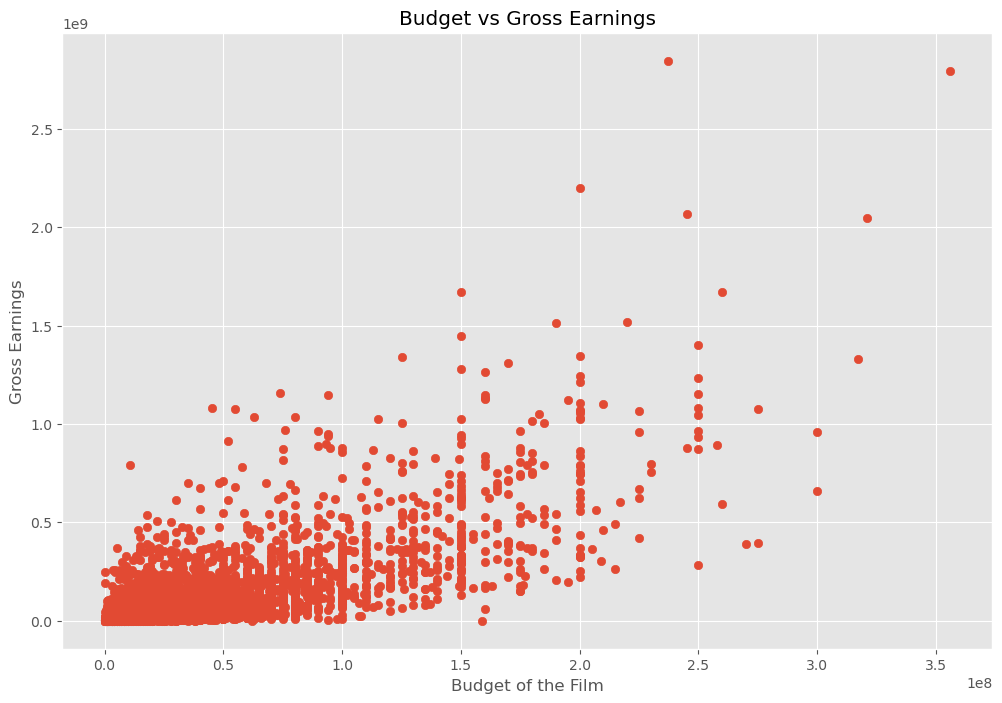

In [156]:
# STEP 6: CORRELATION - Scatter plot for Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget of the Film')
plt.ylabel('Gross Earnings')

plt.show()

In [157]:
df.head()

name rating   genre  \
7387                         Avengers: Endgame  PG-13  Action   
7186                    Avengers: Infinity War  PG-13  Action   
7017   Star Wars: Episode VIII - The Last Jedi  PG-13  Action   
5007  Pirates of the Caribbean: at World's End  PG-13  Action   
7008                            Justice League  PG-13  Action   

                               released  score     votes        director  \
7387     April 26, 2019 (United States)    8.4  903000.0   Anthony Russo   
7186     April 27, 2018 (United States)    8.4  897000.0   Anthony Russo   
7017  December 15, 2017 (United States)    7.0  581000.0    Rian Johnson   
5007       May 25, 2007 (United States)    7.1  608000.0  Gore Verbinski   
7008  November 17, 2017 (United States)    6.1  418000.0     Zack Snyder   

                  writer               star        country       budget  \
7387  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
7186  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
7017        Rian Johnson       Daisy Ridley  United States  317000000.0   
5007         Ted Elliott        Johnny Depp  United States  300000000.0   
7008        Jerry Siegel        Ben Affleck  United States  300000000.0   

             gross               company  runtime  correctyear  
7387  2.797501e+09        Marvel Studios    181.0         2019  
7186  2.048360e+09        Marvel Studios    149.0         2018  
7017  1.332699e+09  Walt Disney Pictures    152.0         2017  
5007  9.609965e+08  Walt Disney Pictures    169.0         2007  
7008  6.579270e+08          Warner Bros.    120.0         2017

<Axes: xlabel='budget', ylabel='gross'>

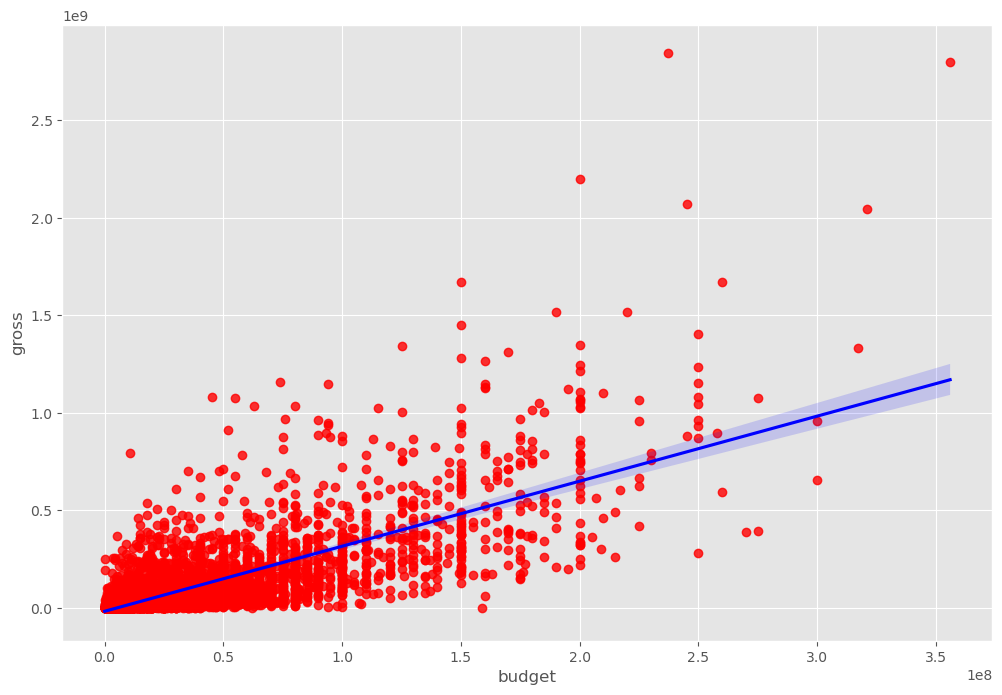

In [158]:
# STEP 7: CORRELATION - Display seaborn plot for Budget vs Gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [159]:
# STEP 8: CORRELATION - Display correlation for numeric values in a matrix structure

df.corr(numeric_only=True, method='pearson') # pearson, kendall, spearman

score     votes    budget     gross   runtime  correctyear
score        1.000000  0.474450  0.071408  0.222397  0.414527     0.061177
votes        0.474450  1.000000  0.439130  0.614457  0.352202     0.202344
budget       0.071408  0.439130  1.000000  0.740044  0.318266     0.319827
gross        0.222397  0.614457  0.740044  1.000000  0.275591     0.268233
runtime      0.414527  0.352202  0.318266  0.275591  1.000000     0.075053
correctyear  0.061177  0.202344  0.319827  0.268233  0.075053     1.000000

In [ ]:
# High correlation between gross and budget
# High correlation between gross and votes

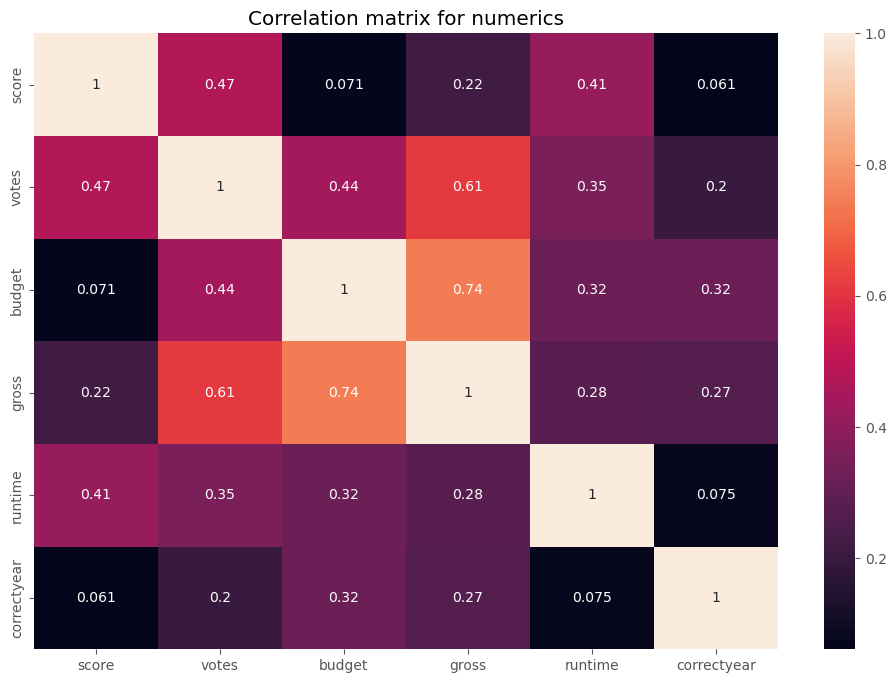

In [160]:
# STEP 9: CORRELATION - Displaying correlation for numeric values in a matrix view

correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numerics')

plt.show()

In [161]:
# STEP 10: Calculate numeric values for all columns with non-numeric values

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  released  score      votes  director  writer  star  \
7387   388       5      0       132    8.4   903000.0       105     511  1464   
7186   389       5      0       140    8.4   897000.0       105     511  1464   
7017  3634       5      0       494    7.0   581000.0      1586    2484   355   
5007  2977       5      0      1834    7.1   608000.0       672    2924   885   
7008  2117       5      0      1986    6.1   418000.0      2053    1400   139   
7203  3535       5      0      1838    6.9   306000.0      1695    1600    30   
7405  3630       5      0       547    6.5   394000.0       766     487   355   
4817  3724       5      0      1423    6.0   274000.0       232    2074   191   
5605  3780       4      2      2053    7.7   417000.0      1391     577  1136   
7422  4376       4      2      1119    6.9   222000.0      1009    1359   454   
5004  3584       5      0      1888    6.2   513000.0      1732    2704  1719   
5990  4037       5      0      1137    8.4  1600000.0       317    1604   296   
6586   387       5      0      1705    7.3   777000.0      1057    1644  1464   
6812   456       5      0      1608    6.4   655000.0      2053     487   139   
6397  4230       5      1       513    7.4   487000.0      1517     965   678   
5804  2978       5      0      1793    6.6   492000.0      1632    2924   885   
6997  4108       5      0        40    6.6   214000.0       566    1011  1779   
6788   750       5      0      1900    7.8   694000.0       105     511   282   
5398  1727       4      0      1084    7.6   492000.0       451    2859   377   
6022  2069       5      0      1696    6.6   260000.0        81     151  1677   
6607  3572       5      0      2114    6.8   393000.0      1729    1525   372   
6605  3633       5      0       523    7.8   876000.0       766    1804   355   
5392   386       5      0       521    7.8  1100000.0       782    1261  1528   
6004  3849       5      0      1210    6.9   571000.0      1217    1294    74   
7010  2976       5      0      1847    6.5   275000.0       901    1359   885   
4799  2975       5      0      1248    7.3   668000.0       672    2924   885   
6197  2413       5      0      1308    7.0   721000.0      2053     722   655   
5238  3979       4      0      1752    6.5   199000.0        69     129   140   
6196  4231       5      1       479    7.8   615000.0      1517     965   678   
6044  2496       5      0      1836    6.8   342000.0       136     944  1806   
5986  3867       5      0      1889    8.0  1300000.0      1057    1644  1464   
7029  4939       5      0      1364    5.2   140000.0      1299     217  1156   
6238  2877       4      1      1689    6.3   201000.0      1732    2183   717   
6279  4386       5      0      1211    6.4   225000.0       672    1666   885   
6436  4936       5      0      1417    5.6   302000.0      1299     884  1156   
4823  5274       5      0      1843    6.7   491000.0       205    2789  1351   
6023   463       5      0      1766    5.8   240000.0      1501    1580    43   
4606  2154       5      0       484    7.2   403000.0      1517     965  1278   
7585  3806       5      0      2499    7.4   387000.0       317     514   866   
6187  2007       5      0      1871    7.1   779000.0      1764     835  1464   
6649  4173       4      2      2058    6.7   106000.0      1529     316   781   
5648  3054       5      0      1861    6.6   277000.0      1372     303   707   
4212  3810       6      0      1125    6.3   383000.0      1032    1472   119   
7223  1959       4      2      1318    7.6   263000.0       193     325   343   
6002  3488       5      0      2136    7.7   642000.0      1729    2218   372   
6991  1667       5      0      1894    7.6   596000.0       792    1276   292   
6850  1408       4      2      1332    7.3   250000.0        81     151   509   
5561    76       4      2      2113    6.8   106000.0      1671     439   827   
7430  4923       1      2      1365  

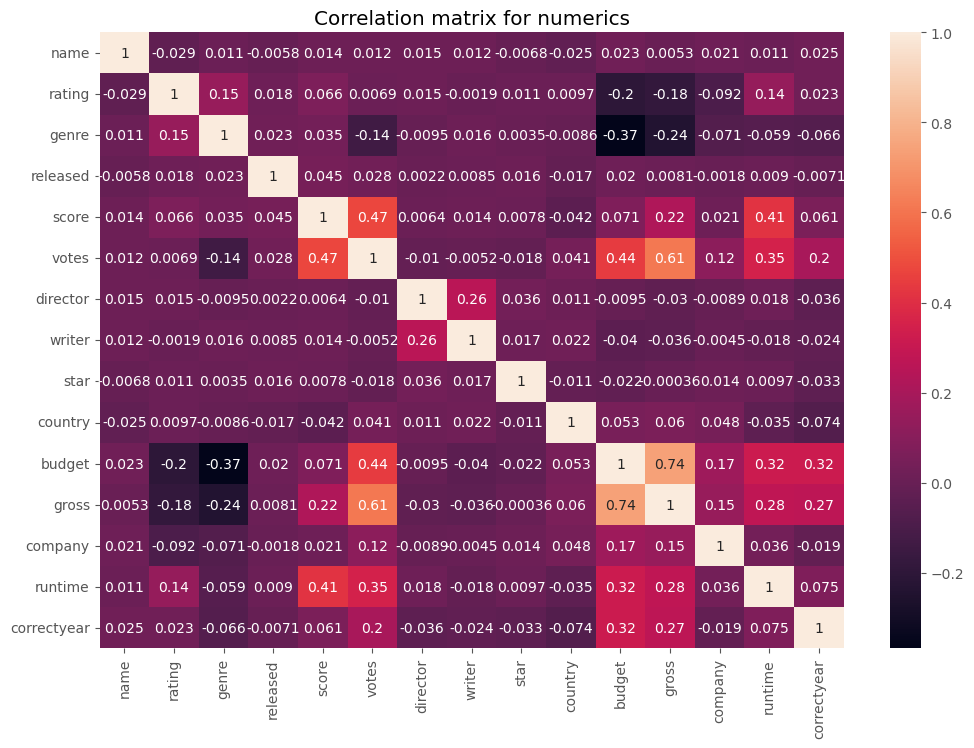

In [163]:
# STEP 11: CORRELATION - Displaying correlation for all numeric values in a matrix view

correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numerics')

plt.show()

In [164]:
df_numerized.corr()

name    rating     genre  released     score     votes  \
name         1.000000 -0.029206  0.010840 -0.005846  0.013644  0.012261   
rating      -0.029206  1.000000  0.148032  0.018206  0.066160  0.006901   
genre        0.010840  0.148032  1.000000  0.023395  0.035311 -0.135086   
released    -0.005846  0.018206  0.023395  1.000000  0.045232  0.028356   
score        0.013644  0.066160  0.035311  0.045232  1.000000  0.474450   
votes        0.012261  0.006901 -0.135086  0.028356  0.474450  1.000000   
director     0.014693  0.014806 -0.009526  0.002213  0.006354 -0.010265   
writer       0.012449 -0.001855  0.016238  0.008543  0.014291 -0.005219   
star        -0.006848  0.010914  0.003476  0.015698  0.007780 -0.018023   
country     -0.025191  0.009745 -0.008552 -0.016599 -0.042063  0.041368   
budget       0.022948 -0.203096 -0.368329  0.019571  0.071408  0.439130   
gross        0.005274 -0.181428 -0.243621  0.008125  0.222397  0.614457   
company      0.021205 -0.091575 -0.071253 -0.001824  0.020616  0.117844   
runtime      0.011080  0.142232 -0.059070  0.009042  0.414527  0.352202   
correctyear  0.025472  0.022723 -0.066329 -0.007114  0.061177  0.202344   

             director    writer      star   country    budget     gross  \
name         0.014693  0.012449 -0.006848 -0.025191  0.022948  0.005274   
rating       0.014806 -0.001855  0.010914  0.009745 -0.203096 -0.181428   
genre       -0.009526  0.016238  0.003476 -0.008552 -0.368329 -0.243621   
released     0.002213  0.008543  0.015698 -0.016599  0.019571  0.008125   
score        0.006354  0.014291  0.007780 -0.042063  0.071408  0.222397   
votes       -0.010265 -0.005219 -0.018023  0.041368  0.439130  0.614457   
director     1.000000  0.259868  0.036096  0.011366 -0.009507 -0.029538   
writer       0.259868  1.000000  0.017347  0.022187 -0.039529 -0.035893   
star         0.036096  0.017347  1.000000 -0.011171 -0.022081 -0.000365   
country      0.011366  0.022187 -0.011171  1.000000  0.052521  0.059873   
budget      -0.009507 -0.039529 -0.022081  0.052521  1.000000  0.740044   
gross       -0.029538 -0.035893 -0.000365  0.059873  0.740044  1.000000   
company     -0.008870 -0.004537  0.013783  0.047846  0.169343  0.148998   
runtime      0.018049 -0.017579  0.009697 -0.035474  0.318266  0.275591   
correctyear -0.035865 -0.023678 -0.032709 -0.074132  0.319827  0.268233   

              company   runtime  correctyear  
name         0.021205  0.011080     0.025472  
rating      -0.091575  0.142232     0.022723  
genre       -0.071253 -0.059070    -0.066329  
released    -0.001824  0.009042    -0.007114  
score        0.020616  0.414527     0.061177  
votes        0.117844  0.352202     0.202344  
director    -0.008870  0.018049    -0.035865  
writer      -0.004537 -0.017579    -0.023678  
star         0.013783  0.009697    -0.032709  
country      0.047846 -0.035474    -0.074132  
budget       0.169343  0.318266     0.319827  
gross        0.148998  0.275591     0.268233  
company      1.000000  0.035957    -0.019016  
runtime      0.035957  1.000000     0.075053  
correctyear -0.019016  0.075053     1.000000

In [58]:
# STEP 12: CORRELATION - Correlate numerics pairs for values > 0.4 after sorting

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             correctyear    0.026784
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [59]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
year         genre         -0.073167
genre        year          -0.073167
country      correctyear   -0.071611
correctyear  country       -0.071611
company      genre         -0.071334
genre        company       -0.071334
correctyear  genre         -0.067962
genre        correctyear   -0.067962
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [63]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
                         
high_corr

score        runtime        0.414068
runtime      score          0.414068
budget       votes          0.439675
votes        budget         0.439675
score        votes          0.474256
votes        score          0.474256
             gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
correctyear  year           0.994821
year         correctyear    0.994821
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
c